# Lecture des données

In [2]:
from pandas import json_normalize
import pandas as pd

df = pd.read_json("Data/ensai_2024_req_tourisme_responsable.json")
df.head()

,total,results,seed
0,1496,"{'id': '67d0c562-fb00-4228-aa08-e504a8077c38',...",NaN
1,1496,"{'id': '9798263d-96a3-4e35-9ba2-f15c6f6402d8',...",NaN
2,1496,"{'id': '885d953e-a29a-4323-96d8-f149d3e512c7',...",NaN
3,1496,"{'id': '6a660958-f5c7-44ce-83de-d165263c8986',...",NaN
4,1496,"{'id': 'fb259cf7-ec19-459b-a6ad-2254689b14c3',...",NaN


# Check des clés du dictionnaire

In [3]:
df["results"].iloc[0]

{'id': '67d0c562-fb00-4228-aa08-e504a8077c38',
 'userId': '93ef60de-5827-49f1-bd56-e1f580619540',
 'content': "Il faut favoriser le stationnement des véhicules de loisir proche des sites touristiques au même titre qu'un véhicule léger.",
 'contentLanguage': 'fr',
 'translatedContent': None,
 'translatedLanguage': None,
 'slug': 'il-faut-favoriser-le-stationnement-des-vehicules-de-loisir-proche-des-sites-touristiques-au-meme-titre-qu-un-vehicule-leger',
 'status': 'Accepted',
 'createdAt': '2021-06-04T08:36:40.430Z',
 'updatedAt': '2021-08-19T12:29:37.892Z',
 'votes': [{'voteKey': 'agree',
   'count': 46,
   'score': 0.37,
   'qualifications': [{'qualificationKey': 'likeIt',
     'count': 8,
     'hasQualified': False},
    {'qualificationKey': 'platitudeAgree', 'count': 2, 'hasQualified': False},
    {'qualificationKey': 'doable', 'count': 11, 'hasQualified': False}],
   'hasVoted': False},
  {'voteKey': 'neutral',
   'count': 38,
   'score': 0.37,
   'qualifications': [{'qualification

# Selection et reorganisation en dataframe

On ne va selectionner que les informations :
- Content : le contenu de la proposition citoyenne
- contentLanguage : la langue dans lequel la proposition est ecrite
- votes :
    - votekey : agree, disagree, neutral
    - count : le decompte du nombre de votes soit agree, soit disagree, soit neutral
    - qualificationkey : correspond à des sous-vote
        - likeIt, platitudeagree, doable c'est les sous categories de agree
        - noOpinion, doNotUnderstand, doNotCare c'est les sous categories de neutral
        - impossible, noWay, platitudeDisagree c'est les sous categories de disagree
        - count : le decompte pour chque sous vote, quand il y en a
NB : platitudeagree/disagree c'est banalité 

In [4]:
# Utiliser json_normalize pour aplatir les données JSON
df_filtered_1 = json_normalize(df['results'])

df_filtered_1.head()

,id,userId,content,contentLanguage,translatedContent,translatedLanguage,slug,status,createdAt,updatedAt,...,question.questionId,question.slug,question.wording.title,question.wording.question,question.countries,question.preferredLanguage,question.returnedLanguage,question.startDate,question.endDate,selectedStakeTag
0,67d0c562-fb00-4228-aa08-e504a8077c38,93ef60de-5827-49f1-bd56-e1f580619540,Il faut favoriser le stationnement des véhicul...,fr,None,None,il-faut-favoriser-le-stationnement-des-vehicul...,Accepted,2021-06-04T08:36:40.430Z,2021-08-19T12:29:37.892Z,...,06ad8da3-9a66-4a55-81ed-ebb5b49cd090,tourisme-responsable,Tourisme Responsable,Comment agir pour un tourisme plus responsable...,"[FR, BE, CA, CH]",None,fr,2021-05-10T07:00:00.000Z,2021-06-20T16:00:00.000Z,NaN
1,9798263d-96a3-4e35-9ba2-f15c6f6402d8,dd920812-f535-438d-a1d2-f7c72a24bc98,Il faut éviter la course aux équipements et à ...,fr,None,None,il-faut-eviter-la-course-aux-equipements-et-a-...,Accepted,2021-06-04T11:44:02.947Z,2021-08-19T12:29:38.022Z,...,06ad8da3-9a66-4a55-81ed-ebb5b49cd090,tourisme-responsable,Tourisme Responsable,Comment agir pour un tourisme plus responsable...,"[FR, BE, CA, CH]",None,fr,2021-05-10T07:00:00.000Z,2021-06-20T16:00:00.000Z,NaN
2,885d953e-a29a-4323-96d8-f149d3e512c7,38cf0349-3b79-4f4a-8c8f-14bfe1d3a854,Il faut remettre en service les petites lignes...,fr,None,None,il-faut-remettre-en-service-les-petites-lignes...,Accepted,2021-06-02T06:40:12.070Z,2021-08-19T12:29:38.123Z,...,06ad8da3-9a66-4a55-81ed-ebb5b49cd090,tourisme-responsable,Tourisme Responsable,Comment agir pour un tourisme plus responsable...,"[FR, BE, CA, CH]",None,fr,2021-05-10T07:00:00.000Z,2021-06-20T16:00:00.000Z,NaN
3,6a660958-f5c7-44ce-83de-d165263c8986,c7846aa6-6c28-4d27-8f75-4eb3f21c2054,Il faut taxer de manière significative tous le...,fr,None,None,il-faut-taxer-de-maniere-significative-tous-le...,Accepted,2021-05-11T13:04:00.694Z,2021-08-19T12:29:38.128Z,...,06ad8da3-9a66-4a55-81ed-ebb5b49cd090,tourisme-responsable,Tourisme Responsable,Comment agir pour un tourisme plus responsable...,"[FR, BE, CA, CH]",None,fr,2021-05-10T07:00:00.000Z,2021-06-20T16:00:00.000Z,NaN
4,fb259cf7-ec19-459b-a6ad-2254689b14c3,39ae8c6b-e853-48a9-ad03-150ff2009f9e,Il faut un questionnaire obligatoire à chaque ...,fr,None,None,il-faut-un-questionnaire-obligatoire-a-chaque-...,Accepted,2021-05-17T10:00:23.865Z,2021-08-19T12:29:36.077Z,...,06ad8da3-9a66-4a55-81ed-ebb5b49cd090,tourisme-responsable,Tourisme Responsable,Comment agir pour un tourisme plus responsable...,"[FR, BE, CA, CH]",None,fr,2021-05-10T07:00:00.000Z,2021-06-20T16:00:00.000Z,NaN


# Check des colonnes qui ont été créé

In [5]:
df_filtered_1.columns

Index(['id', 'userId', 'content', 'contentLanguage', 'translatedContent',
       'translatedLanguage', 'slug', 'status', 'createdAt', 'updatedAt',
       'votes', 'organisations', 'tags', 'myProposal', 'idea', 'operationId',
       'proposalKey', 'keywords', 'context.operation', 'context.source',
       'context.location', 'context.questionSlug', 'context.country',
       'context.questionLanguage', 'context.proposalLanguage',
       'context.clientLanguage', 'context.getParameters', 'author.firstName',
       'author.displayName', 'author.organisationName',
       'author.organisationSlug', 'author.postalCode', 'author.age',
       'author.avatarUrl', 'author.userType', 'selectedStakeTag.tagId',
       'selectedStakeTag.label', 'selectedStakeTag.display',
       'question.questionId', 'question.slug', 'question.wording.title',
       'question.wording.question', 'question.countries',
       'question.preferredLanguage', 'question.returnedLanguage',
       'question.startDate', 'questi

# Check de la colonne vote et de son contenu

In [6]:
df_filtered_1['votes'].head()

0    [{'voteKey': 'agree', 'count': 46, 'score': 0....
1    [{'voteKey': 'agree', 'count': 52, 'score': 0....
2    [{'voteKey': 'agree', 'count': 591, 'score': 0...
3    [{'voteKey': 'agree', 'count': 91, 'score': 0....
4    [{'voteKey': 'agree', 'count': 70, 'score': 0....
Name: votes, dtype: object

# Decoupage du sous - dictionnaire de la colonne votes

In [7]:
df_filtered_1 = df_filtered_1.join(json_normalize(df_filtered_1['votes']))
df_filtered_1.head()

,id,userId,content,contentLanguage,translatedContent,translatedLanguage,slug,status,createdAt,updatedAt,...,question.wording.question,question.countries,question.preferredLanguage,question.returnedLanguage,question.startDate,question.endDate,selectedStakeTag,0,1,2
0,67d0c562-fb00-4228-aa08-e504a8077c38,93ef60de-5827-49f1-bd56-e1f580619540,Il faut favoriser le stationnement des véhicul...,fr,None,None,il-faut-favoriser-le-stationnement-des-vehicul...,Accepted,2021-06-04T08:36:40.430Z,2021-08-19T12:29:37.892Z,...,Comment agir pour un tourisme plus responsable...,"[FR, BE, CA, CH]",None,fr,2021-05-10T07:00:00.000Z,2021-06-20T16:00:00.000Z,NaN,"{'voteKey': 'agree', 'count': 46, 'score': 0.3...","{'voteKey': 'neutral', 'count': 38, 'score': 0...","{'voteKey': 'disagree', 'count': 30, 'score': ..."
1,9798263d-96a3-4e35-9ba2-f15c6f6402d8,dd920812-f535-438d-a1d2-f7c72a24bc98,Il faut éviter la course aux équipements et à ...,fr,None,None,il-faut-eviter-la-course-aux-equipements-et-a-...,Accepted,2021-06-04T11:44:02.947Z,2021-08-19T12:29:38.022Z,...,Comment agir pour un tourisme plus responsable...,"[FR, BE, CA, CH]",None,fr,2021-05-10T07:00:00.000Z,2021-06-20T16:00:00.000Z,NaN,"{'voteKey': 'agree', 'count': 52, 'score': 0.4...","{'voteKey': 'neutral', 'count': 28, 'score': 0...","{'voteKey': 'disagree', 'count': 33, 'score': ..."
2,885d953e-a29a-4323-96d8-f149d3e512c7,38cf0349-3b79-4f4a-8c8f-14bfe1d3a854,Il faut remettre en service les petites lignes...,fr,None,None,il-faut-remettre-en-service-les-petites-lignes...,Accepted,2021-06-02T06:40:12.070Z,2021-08-19T12:29:38.123Z,...,Comment agir pour un tourisme plus responsable...,"[FR, BE, CA, CH]",None,fr,2021-05-10T07:00:00.000Z,2021-06-20T16:00:00.000Z,NaN,"{'voteKey': 'agree', 'count': 591, 'score': 0....","{'voteKey': 'neutral', 'count': 96, 'score': 0...","{'voteKey': 'disagree', 'count': 90, 'score': ..."
3,6a660958-f5c7-44ce-83de-d165263c8986,c7846aa6-6c28-4d27-8f75-4eb3f21c2054,Il faut taxer de manière significative tous le...,fr,None,None,il-faut-taxer-de-maniere-significative-tous-le...,Accepted,2021-05-11T13:04:00.694Z,2021-08-19T12:29:38.128Z,...,Comment agir pour un tourisme plus responsable...,"[FR, BE, CA, CH]",None,fr,2021-05-10T07:00:00.000Z,2021-06-20T16:00:00.000Z,NaN,"{'voteKey': 'agree', 'count': 91, 'score': 0.6...","{'voteKey': 'neutral', 'count': 24, 'score': 0...","{'voteKey': 'disagree', 'count': 36, 'score': ..."
4,fb259cf7-ec19-459b-a6ad-2254689b14c3,39ae8c6b-e853-48a9-ad03-150ff2009f9e,Il faut un questionnaire obligatoire à chaque ...,fr,None,None,il-faut-un-questionnaire-obligatoire-a-chaque-...,Accepted,2021-05-17T10:00:23.865Z,2021-08-19T12:29:36.077Z,...,Comment agir pour un tourisme plus responsable...,"[FR, BE, CA, CH]",None,fr,2021-05-10T07:00:00.000Z,2021-06-20T16:00:00.000Z,NaN,"{'voteKey': 'agree', 'count': 70, 'score': 0.3...","{'voteKey': 'neutral', 'count': 53, 'score': 0...","{'voteKey': 'disagree', 'count': 77, 'score': ..."


# Renommage des colonnes pour plus de clareté

In [8]:
# Renommer les colonnes
df_filtered_1 = df_filtered_1.rename(columns={0: 'agree', 1: 'neutral', 2: 'disagree'})
df_filtered_1.head()

,id,userId,content,contentLanguage,translatedContent,translatedLanguage,slug,status,createdAt,updatedAt,...,question.wording.question,question.countries,question.preferredLanguage,question.returnedLanguage,question.startDate,question.endDate,selectedStakeTag,agree,neutral,disagree
0,67d0c562-fb00-4228-aa08-e504a8077c38,93ef60de-5827-49f1-bd56-e1f580619540,Il faut favoriser le stationnement des véhicul...,fr,None,None,il-faut-favoriser-le-stationnement-des-vehicul...,Accepted,2021-06-04T08:36:40.430Z,2021-08-19T12:29:37.892Z,...,Comment agir pour un tourisme plus responsable...,"[FR, BE, CA, CH]",None,fr,2021-05-10T07:00:00.000Z,2021-06-20T16:00:00.000Z,NaN,"{'voteKey': 'agree', 'count': 46, 'score': 0.3...","{'voteKey': 'neutral', 'count': 38, 'score': 0...","{'voteKey': 'disagree', 'count': 30, 'score': ..."
1,9798263d-96a3-4e35-9ba2-f15c6f6402d8,dd920812-f535-438d-a1d2-f7c72a24bc98,Il faut éviter la course aux équipements et à ...,fr,None,None,il-faut-eviter-la-course-aux-equipements-et-a-...,Accepted,2021-06-04T11:44:02.947Z,2021-08-19T12:29:38.022Z,...,Comment agir pour un tourisme plus responsable...,"[FR, BE, CA, CH]",None,fr,2021-05-10T07:00:00.000Z,2021-06-20T16:00:00.000Z,NaN,"{'voteKey': 'agree', 'count': 52, 'score': 0.4...","{'voteKey': 'neutral', 'count': 28, 'score': 0...","{'voteKey': 'disagree', 'count': 33, 'score': ..."
2,885d953e-a29a-4323-96d8-f149d3e512c7,38cf0349-3b79-4f4a-8c8f-14bfe1d3a854,Il faut remettre en service les petites lignes...,fr,None,None,il-faut-remettre-en-service-les-petites-lignes...,Accepted,2021-06-02T06:40:12.070Z,2021-08-19T12:29:38.123Z,...,Comment agir pour un tourisme plus responsable...,"[FR, BE, CA, CH]",None,fr,2021-05-10T07:00:00.000Z,2021-06-20T16:00:00.000Z,NaN,"{'voteKey': 'agree', 'count': 591, 'score': 0....","{'voteKey': 'neutral', 'count': 96, 'score': 0...","{'voteKey': 'disagree', 'count': 90, 'score': ..."
3,6a660958-f5c7-44ce-83de-d165263c8986,c7846aa6-6c28-4d27-8f75-4eb3f21c2054,Il faut taxer de manière significative tous le...,fr,None,None,il-faut-taxer-de-maniere-significative-tous-le...,Accepted,2021-05-11T13:04:00.694Z,2021-08-19T12:29:38.128Z,...,Comment agir pour un tourisme plus responsable...,"[FR, BE, CA, CH]",None,fr,2021-05-10T07:00:00.000Z,2021-06-20T16:00:00.000Z,NaN,"{'voteKey': 'agree', 'count': 91, 'score': 0.6...","{'voteKey': 'neutral', 'count': 24, 'score': 0...","{'voteKey': 'disagree', 'count': 36, 'score': ..."
4,fb259cf7-ec19-459b-a6ad-2254689b14c3,39ae8c6b-e853-48a9-ad03-150ff2009f9e,Il faut un questionnaire obligatoire à chaque ...,fr,None,None,il-faut-un-questionnaire-obligatoire-a-chaque-...,Accepted,2021-05-17T10:00:23.865Z,2021-08-19T12:29:36.077Z,...,Comment agir pour un tourisme plus responsable...,"[FR, BE, CA, CH]",None,fr,2021-05-10T07:00:00.000Z,2021-06-20T16:00:00.000Z,NaN,"{'voteKey': 'agree', 'count': 70, 'score': 0.3...","{'voteKey': 'neutral', 'count': 53, 'score': 0...","{'voteKey': 'disagree', 'count': 77, 'score': ..."


# Decoupage avec ajout d'un prefix et création de colonnes

In [9]:
df_filtered_1 = df_filtered_1.join(json_normalize(df_filtered_1["agree"]).add_prefix('agree_'))
df_filtered_1 = df_filtered_1.join(json_normalize(df_filtered_1["neutral"]).add_prefix('neutral_'))
df_filtered_1 = df_filtered_1.join(json_normalize(df_filtered_1["disagree"]).add_prefix('disagree_'))

df_filtered_1.head()

,id,userId,content,contentLanguage,translatedContent,translatedLanguage,slug,status,createdAt,updatedAt,...,neutral_voteKey,neutral_count,neutral_score,neutral_qualifications,neutral_hasVoted,disagree_voteKey,disagree_count,disagree_score,disagree_qualifications,disagree_hasVoted
0,67d0c562-fb00-4228-aa08-e504a8077c38,93ef60de-5827-49f1-bd56-e1f580619540,Il faut favoriser le stationnement des véhicul...,fr,None,None,il-faut-favoriser-le-stationnement-des-vehicul...,Accepted,2021-06-04T08:36:40.430Z,2021-08-19T12:29:37.892Z,...,neutral,38,0.37,"[{'qualificationKey': 'noOpinion', 'count': 6,...",False,disagree,30,0.26,"[{'qualificationKey': 'impossible', 'count': 4...",False
1,9798263d-96a3-4e35-9ba2-f15c6f6402d8,dd920812-f535-438d-a1d2-f7c72a24bc98,Il faut éviter la course aux équipements et à ...,fr,None,None,il-faut-eviter-la-course-aux-equipements-et-a-...,Accepted,2021-06-04T11:44:02.947Z,2021-08-19T12:29:38.022Z,...,neutral,28,0.25,"[{'qualificationKey': 'noOpinion', 'count': 7,...",False,disagree,33,0.31,"[{'qualificationKey': 'impossible', 'count': 4...",False
2,885d953e-a29a-4323-96d8-f149d3e512c7,38cf0349-3b79-4f4a-8c8f-14bfe1d3a854,Il faut remettre en service les petites lignes...,fr,None,None,il-faut-remettre-en-service-les-petites-lignes...,Accepted,2021-06-02T06:40:12.070Z,2021-08-19T12:29:38.123Z,...,neutral,96,0.12,"[{'qualificationKey': 'noOpinion', 'count': 37...",False,disagree,90,0.12,"[{'qualificationKey': 'impossible', 'count': 4...",False
3,6a660958-f5c7-44ce-83de-d165263c8986,c7846aa6-6c28-4d27-8f75-4eb3f21c2054,Il faut taxer de manière significative tous le...,fr,None,None,il-faut-taxer-de-maniere-significative-tous-le...,Accepted,2021-05-11T13:04:00.694Z,2021-08-19T12:29:38.128Z,...,neutral,24,0.16,"[{'qualificationKey': 'noOpinion', 'count': 5,...",False,disagree,36,0.23,"[{'qualificationKey': 'impossible', 'count': 7...",False
4,fb259cf7-ec19-459b-a6ad-2254689b14c3,39ae8c6b-e853-48a9-ad03-150ff2009f9e,Il faut un questionnaire obligatoire à chaque ...,fr,None,None,il-faut-un-questionnaire-obligatoire-a-chaque-...,Accepted,2021-05-17T10:00:23.865Z,2021-08-19T12:29:36.077Z,...,neutral,53,0.27,"[{'qualificationKey': 'noOpinion', 'count': 15...",False,disagree,77,0.39,"[{'qualificationKey': 'impossible', 'count': 2...",False


# Même principe mais avec les sous votes

In [10]:
df_filtered_1 = df_filtered_1.join(json_normalize(df_filtered_1["agree_qualifications"]).add_prefix('agree_qualifications'))
df_filtered_1 = df_filtered_1.join(json_normalize(df_filtered_1["neutral_qualifications"]).add_prefix('neutral_qualifications'))
df_filtered_1 = df_filtered_1.join(json_normalize(df_filtered_1["disagree_qualifications"]).add_prefix('disagree_qualifications'))

df_filtered_1.head()

,id,userId,content,contentLanguage,translatedContent,translatedLanguage,slug,status,createdAt,updatedAt,...,disagree_hasVoted,agree_qualifications0,agree_qualifications1,agree_qualifications2,neutral_qualifications0,neutral_qualifications1,neutral_qualifications2,disagree_qualifications0,disagree_qualifications1,disagree_qualifications2
0,67d0c562-fb00-4228-aa08-e504a8077c38,93ef60de-5827-49f1-bd56-e1f580619540,Il faut favoriser le stationnement des véhicul...,fr,None,None,il-faut-favoriser-le-stationnement-des-vehicul...,Accepted,2021-06-04T08:36:40.430Z,2021-08-19T12:29:37.892Z,...,False,"{'qualificationKey': 'likeIt', 'count': 8, 'ha...","{'qualificationKey': 'platitudeAgree', 'count'...","{'qualificationKey': 'doable', 'count': 11, 'h...","{'qualificationKey': 'noOpinion', 'count': 6, ...","{'qualificationKey': 'doNotUnderstand', 'count...","{'qualificationKey': 'doNotCare', 'count': 4, ...","{'qualificationKey': 'impossible', 'count': 4,...","{'qualificationKey': 'noWay', 'count': 13, 'ha...","{'qualificationKey': 'platitudeDisagree', 'cou..."
1,9798263d-96a3-4e35-9ba2-f15c6f6402d8,dd920812-f535-438d-a1d2-f7c72a24bc98,Il faut éviter la course aux équipements et à ...,fr,None,None,il-faut-eviter-la-course-aux-equipements-et-a-...,Accepted,2021-06-04T11:44:02.947Z,2021-08-19T12:29:38.022Z,...,False,"{'qualificationKey': 'likeIt', 'count': 9, 'ha...","{'qualificationKey': 'platitudeAgree', 'count'...","{'qualificationKey': 'doable', 'count': 14, 'h...","{'qualificationKey': 'noOpinion', 'count': 7, ...","{'qualificationKey': 'doNotUnderstand', 'count...","{'qualificationKey': 'doNotCare', 'count': 1, ...","{'qualificationKey': 'impossible', 'count': 4,...","{'qualificationKey': 'noWay', 'count': 11, 'ha...","{'qualificationKey': 'platitudeDisagree', 'cou..."
2,885d953e-a29a-4323-96d8-f149d3e512c7,38cf0349-3b79-4f4a-8c8f-14bfe1d3a854,Il faut remettre en service les petites lignes...,fr,None,None,il-faut-remettre-en-service-les-petites-lignes...,Accepted,2021-06-02T06:40:12.070Z,2021-08-19T12:29:38.123Z,...,False,"{'qualificationKey': 'likeIt', 'count': 166, '...","{'qualificationKey': 'platitudeAgree', 'count'...","{'qualificationKey': 'doable', 'count': 142, '...","{'qualificationKey': 'noOpinion', 'count': 37,...","{'qualificationKey': 'doNotUnderstand', 'count...","{'qualificationKey': 'doNotCare', 'count': 12,...","{'qualificationKey': 'impossible', 'count': 43...","{'qualificationKey': 'noWay', 'count': 23, 'ha...","{'qualificationKey': 'platitudeDisagree', 'cou..."
3,6a660958-f5c7-44ce-83de-d165263c8986,c7846aa6-6c28-4d27-8f75-4eb3f21c2054,Il faut taxer de manière significative tous le...,fr,None,None,il-faut-taxer-de-maniere-significative-tous-le...,Accepted,2021-05-11T13:04:00.694Z,2021-08-19T12:29:38.128Z,...,False,"{'qualificationKey': 'likeIt', 'count': 26, 'h...","{'qualificationKey': 'platitudeAgree', 'count'...","{'qualificationKey': 'doable', 'count': 31, 'h...","{'qualificationKey': 'noOpinion', 'count': 5, ...","{'qualificationKey': 'doNotUnderstand', 'count...","{'qualificationKey': 'doNotCare', 'count': 1, ...","{'qualificationKey': 'impossible', 'count': 7,...","{'qualificationKey': 'noWay', 'count': 19, 'ha...","{'qualificationKey': 'platitudeDisagree', 'cou..."
4,fb259cf7-ec19-459b-a6ad-2254689b14c3,39ae8c6b-e853-48a9-ad03-150ff2009f9e,Il faut un questionnaire obligatoire à chaque ...,fr,None,None,il-faut-un-questionnaire-obligatoire-a-chaque-...,Accepted,2021-05-17T10:00:23.865Z,2021-08-19T12:29:36.077Z,...,False,"{'qualificationKey': 'likeIt', 'count': 11, 'h...","{'qualificationKey': 'platitudeAgree', 'count'...","{'qualificationKey': 'doable', 'count': 25, 'h...","{'qualificationKey': 'noOpinion', 'count': 15,...","{'qualificationKey': 'doNotUnderstand', 'count...","{'qualificationKey': 'doNotCare', 'count': 7, ...","{'qualificationKey': 'impossible', 'count': 29...","{'qualificationKey': 'noWay', 'count': 20, 'ha...","{'qualificationKey': 'platitudeDisagree', 'cou..."


# Dernier decoupage pour avoir les 9 sous-votes optionnels

In [11]:
df_filtered_1 = df_filtered_1.join(json_normalize(df_filtered_1["agree_qualifications0"]).add_prefix('like_it_'))
df_filtered_1 = df_filtered_1.join(json_normalize(df_filtered_1["agree_qualifications1"]).add_prefix('platitude_agree_'))
df_filtered_1 = df_filtered_1.join(json_normalize(df_filtered_1["agree_qualifications2"]).add_prefix('doable_'))
df_filtered_1 = df_filtered_1.join(json_normalize(df_filtered_1["neutral_qualifications0"]).add_prefix('no_opinion_'))
df_filtered_1 = df_filtered_1.join(json_normalize(df_filtered_1["neutral_qualifications1"]).add_prefix('do_not_understand_'))
df_filtered_1 = df_filtered_1.join(json_normalize(df_filtered_1["neutral_qualifications2"]).add_prefix('do_not_care_'))
df_filtered_1 = df_filtered_1.join(json_normalize(df_filtered_1["disagree_qualifications0"]).add_prefix('imp_'))
df_filtered_1 = df_filtered_1.join(json_normalize(df_filtered_1["disagree_qualifications1"]).add_prefix('no_way_'))
df_filtered_1 = df_filtered_1.join(json_normalize(df_filtered_1["disagree_qualifications2"]).add_prefix('platitude_disagree_'))

df_filtered_1.head()

,id,userId,content,contentLanguage,translatedContent,translatedLanguage,slug,status,createdAt,updatedAt,...,do_not_care_hasQualified,imp_qualificationKey,imp_count,imp_hasQualified,no_way_qualificationKey,no_way_count,no_way_hasQualified,platitude_disagree_qualificationKey,platitude_disagree_count,platitude_disagree_hasQualified
0,67d0c562-fb00-4228-aa08-e504a8077c38,93ef60de-5827-49f1-bd56-e1f580619540,Il faut favoriser le stationnement des véhicul...,fr,None,None,il-faut-favoriser-le-stationnement-des-vehicul...,Accepted,2021-06-04T08:36:40.430Z,2021-08-19T12:29:37.892Z,...,False,impossible,4,False,noWay,13,False,platitudeDisagree,4,False
1,9798263d-96a3-4e35-9ba2-f15c6f6402d8,dd920812-f535-438d-a1d2-f7c72a24bc98,Il faut éviter la course aux équipements et à ...,fr,None,None,il-faut-eviter-la-course-aux-equipements-et-a-...,Accepted,2021-06-04T11:44:02.947Z,2021-08-19T12:29:38.022Z,...,False,impossible,4,False,noWay,11,False,platitudeDisagree,5,False
2,885d953e-a29a-4323-96d8-f149d3e512c7,38cf0349-3b79-4f4a-8c8f-14bfe1d3a854,Il faut remettre en service les petites lignes...,fr,None,None,il-faut-remettre-en-service-les-petites-lignes...,Accepted,2021-06-02T06:40:12.070Z,2021-08-19T12:29:38.123Z,...,False,impossible,43,False,noWay,23,False,platitudeDisagree,13,False
3,6a660958-f5c7-44ce-83de-d165263c8986,c7846aa6-6c28-4d27-8f75-4eb3f21c2054,Il faut taxer de manière significative tous le...,fr,None,None,il-faut-taxer-de-maniere-significative-tous-le...,Accepted,2021-05-11T13:04:00.694Z,2021-08-19T12:29:38.128Z,...,False,impossible,7,False,noWay,19,False,platitudeDisagree,7,False
4,fb259cf7-ec19-459b-a6ad-2254689b14c3,39ae8c6b-e853-48a9-ad03-150ff2009f9e,Il faut un questionnaire obligatoire à chaque ...,fr,None,None,il-faut-un-questionnaire-obligatoire-a-chaque-...,Accepted,2021-05-17T10:00:23.865Z,2021-08-19T12:29:36.077Z,...,False,impossible,29,False,noWay,20,False,platitudeDisagree,11,False


In [12]:
df_filtered_1.columns

Index(['id', 'userId', 'content', 'contentLanguage', 'translatedContent',
       'translatedLanguage', 'slug', 'status', 'createdAt', 'updatedAt',
       ...
       'do_not_care_hasQualified', 'imp_qualificationKey', 'imp_count',
       'imp_hasQualified', 'no_way_qualificationKey', 'no_way_count',
       'no_way_hasQualified', 'platitude_disagree_qualificationKey',
       'platitude_disagree_count', 'platitude_disagree_hasQualified'],
      dtype='object', length=102)

# Check des decomptes
- à comparer avec le resultat de df["results"].iloc[0] situé plus haut dans le notebook

In [13]:
df_filtered_1[['agree_count','neutral_count','disagree_count','like_it_count','platitude_agree_count','doable_count']].head()

,agree_count,neutral_count,disagree_count,like_it_count,platitude_agree_count,doable_count
0,46,38,30,8,2,11
1,52,28,33,9,2,14
2,591,96,90,166,23,142
3,91,24,36,26,5,31
4,70,53,77,11,8,25


# Selection des colonnes à conserver

In [14]:
# les colonne à conserver
cols = ['content','contentLanguage','agree_count','neutral_count','disagree_count','like_it_count','platitude_agree_count','doable_count','no_opinion_count','do_not_understand_count','do_not_care_count','imp_count','no_way_count','platitude_disagree_count']

In [15]:
df_final = df_filtered_1[cols].copy()

In [16]:
df_final.head()

,content,contentLanguage,agree_count,neutral_count,disagree_count,like_it_count,platitude_agree_count,doable_count,no_opinion_count,do_not_understand_count,do_not_care_count,imp_count,no_way_count,platitude_disagree_count
0,Il faut favoriser le stationnement des véhicul...,fr,46,38,30,8,2,11,6,13,4,4,13,4
1,Il faut éviter la course aux équipements et à ...,fr,52,28,33,9,2,14,7,6,1,4,11,5
2,Il faut remettre en service les petites lignes...,fr,591,96,90,166,23,142,37,6,12,43,23,13
3,Il faut taxer de manière significative tous le...,fr,91,24,36,26,5,31,5,2,1,7,19,7
4,Il faut un questionnaire obligatoire à chaque ...,fr,70,53,77,11,8,25,15,2,7,29,20,11


# Filtrage pour n'avoir que les propositions des citoyens en français

In [17]:
df_final['contentLanguage'].value_counts()

contentLanguage
fr    1493
en       3
Name: count, dtype: int64

In [18]:
df_final = df_final[df_final['contentLanguage'] == 'fr']

In [19]:
df_final['contentLanguage'].value_counts()

contentLanguage
fr    1493
Name: count, dtype: int64

# On profite, après le filtrage, pour enlever la colonne contentLanguage qui ne sert à rien

In [20]:
df_final = df_final.drop(columns='contentLanguage', axis = 1)

In [21]:
df_final.head()

,content,agree_count,neutral_count,disagree_count,like_it_count,platitude_agree_count,doable_count,no_opinion_count,do_not_understand_count,do_not_care_count,imp_count,no_way_count,platitude_disagree_count
0,Il faut favoriser le stationnement des véhicul...,46,38,30,8,2,11,6,13,4,4,13,4
1,Il faut éviter la course aux équipements et à ...,52,28,33,9,2,14,7,6,1,4,11,5
2,Il faut remettre en service les petites lignes...,591,96,90,166,23,142,37,6,12,43,23,13
3,Il faut taxer de manière significative tous le...,91,24,36,26,5,31,5,2,1,7,19,7
4,Il faut un questionnaire obligatoire à chaque ...,70,53,77,11,8,25,15,2,7,29,20,11


# Création d'une colonne pour le decompte de "?"

In [22]:
# Compter le nombre de '?' dans chaque élément de la colonne 'phrase' et créer une nouvelle colonne
df_final['nb_interrogations'] = df_final['content'].str.count('\?')

# Création d'une colonne pour le decompte de "!"

In [23]:
# Compter le nombre de '?' dans chaque élément de la colonne 'phrase' et créer une nouvelle colonne
df_final['nb_exclamation'] = df_final['content'].str.count('!')

# Création d'une colonne pour le decompte de smiley

In [24]:
import re

# Définir une expression régulière pour identifier les smileys (ex. : tout caractère entre ':' et ' ' ou la fin de la phrase)
regex_smiley = ':[^\s]+:|:[^\s]+$'

# Compter le nombre de smileys dans chaque élément de la colonne 'phrase' en utilisant l'expression régulière
df_final['nb_smiley'] = df_final['content'].apply(lambda x: len(re.findall(regex_smiley, x)))

In [25]:
df_final.head()

,content,agree_count,neutral_count,disagree_count,like_it_count,platitude_agree_count,doable_count,no_opinion_count,do_not_understand_count,do_not_care_count,imp_count,no_way_count,platitude_disagree_count,nb_interrogations,nb_exclamation,nb_smiley
0,Il faut favoriser le stationnement des véhicul...,46,38,30,8,2,11,6,13,4,4,13,4,0,0,0
1,Il faut éviter la course aux équipements et à ...,52,28,33,9,2,14,7,6,1,4,11,5,0,0,0
2,Il faut remettre en service les petites lignes...,591,96,90,166,23,142,37,6,12,43,23,13,0,0,0
3,Il faut taxer de manière significative tous le...,91,24,36,26,5,31,5,2,1,7,19,7,0,0,0
4,Il faut un questionnaire obligatoire à chaque ...,70,53,77,11,8,25,15,2,7,29,20,11,0,0,0


In [26]:
df_final['nb_interrogations'].value_counts()

nb_interrogations
0    1483
1       9
2       1
Name: count, dtype: int64

In [27]:
df_final['nb_exclamation'].value_counts()

nb_exclamation
0    1454
1      34
2       4
3       1
Name: count, dtype: int64

In [28]:
df_final['nb_smiley'].value_counts()

nb_smiley
0    1493
Name: count, dtype: int64

# Il n'y a pas de smiley donc cette colonne peut être enlevé

In [29]:
df_final = df_final.drop(columns='nb_smiley', axis = 1)

# Preprocessing
- traitement tokenisation avec gensim
- normalisation egalement
- simple preprocess pour normaliser mais je vais aussi avoir min et maj avec la tokenisation de NLTK

In [30]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')  # (facultatif, pour certaines langues)
nltk.download('universal_tagset')  # (facultatif, pour certaines langues)

[nltk_data] Downloading package punkt to /home/ensai/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/ensai/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package universal_tagset to
[nltk_data]     /home/ensai/nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!


True

In [31]:
from nltk.tokenize import word_tokenize

In [32]:
# Tokeniser chaque document dans la colonne 'texte'
df_final['tokens'] = df_final['content'].apply(lambda x: word_tokenize(x, language='french'))

# Visualisation de mes tokens

In [33]:
df_final['tokens'].head()

0    [Il, faut, favoriser, le, stationnement, des, ...
1    [Il, faut, éviter, la, course, aux, équipement...
2    [Il, faut, remettre, en, service, les, petites...
3    [Il, faut, taxer, de, manière, significative, ...
4    [Il, faut, un, questionnaire, obligatoire, à, ...
Name: tokens, dtype: object

In [34]:
# Créer la colonne 'case' en vérifiant si chaque token est en majuscules ou en minuscules
df_final['case'] = df_final['tokens'].apply(lambda tokens: ['Maj' if token.isupper() else 'Min' for token in tokens])

In [35]:
import gensim
from gensim.utils import simple_preprocess

In [36]:
# Tokeniser chaque document dans la colonne 'texte'
df_final['tokens_normalized'] = df_final['content'].apply(lambda x: simple_preprocess(x, deacc=True))

In [37]:
df_final[['case','tokens_normalized']].head()

,case,tokens_normalized
0,"[Min, Min, Min, Min, Min, Min, Min, Min, Min, ...","[il, faut, favoriser, le, stationnement, des, ..."
1,"[Min, Min, Min, Min, Min, Min, Min, Min, Min, ...","[il, faut, eviter, la, course, aux, equipement..."
2,"[Min, Min, Min, Min, Min, Min, Min, Min, Maj, ...","[il, faut, remettre, en, service, les, petites..."
3,"[Min, Min, Min, Min, Min, Min, Min, Min, Min, ...","[il, faut, taxer, de, maniere, significative, ..."
4,"[Min, Min, Min, Min, Min, Min, Min, Min, Min, ...","[il, faut, un, questionnaire, obligatoire, cha..."


In [38]:
df_final['tokens'].iloc[2]

['Il',
 'faut',
 'remettre',
 'en',
 'service',
 'les',
 'petites',
 'lignes',
 'SNCF',
 'intérieures',
 'que',
 "l'on",
 'ferme',
 'depuis',
 'plusieurs',
 'années']

Peut être que le compteur sera à améliorer car ici on est sur une entité comme la SNCF. On va essayer comme ça, sans modification dans un premier temps.

# Traitement des stop words

In [39]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('french'))  # Charger les stop words pour le français

[nltk_data] Downloading package stopwords to /home/ensai/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [40]:
# Enlever les stop words des tokens normalisés et stocker les mots retirés dans une nouvelle colonne
df_final['stop_words'] = df_final['tokens_normalized'].apply(lambda tokens: [token for token in tokens if token in stop_words])

In [41]:
df_final[['tokens_normalized','stop_words']].head()

,tokens_normalized,stop_words
0,"[il, faut, favoriser, le, stationnement, des, ...","[il, le, des, de, des, au, qu, un]"
1,"[il, faut, eviter, la, course, aux, equipement...","[il, la, aux, et, la, des, dans, les]"
2,"[il, faut, remettre, en, service, les, petites...","[il, en, les, que, on]"
3,"[il, faut, taxer, de, maniere, significative, ...","[il, de, les, le, pas, en]"
4,"[il, faut, un, questionnaire, obligatoire, cha...","[il, un, qui, le, de, de, ses]"


In [42]:
# Enlever les deux premiers termes de chaque liste dans la colonne 'tokens_normalized'
df_final['tokens_normalized'] = df_final['tokens_normalized'].apply(lambda tokens: tokens[2:])

In [43]:
df_final['tokens_normalized'].head()

0    [favoriser, le, stationnement, des, vehicules,...
1    [eviter, la, course, aux, equipements, et, la,...
2    [remettre, en, service, les, petites, lignes, ...
3    [taxer, de, maniere, significative, tous, les,...
4    [un, questionnaire, obligatoire, chaque, reser...
Name: tokens_normalized, dtype: object

In [44]:
# Enlever les stop words des tokens normalisés
df_final['tokens_final'] = df_final['tokens_normalized'].apply(lambda tokens: [token for token in tokens if token not in stop_words])

In [45]:
df_final['tokens_final'].head()

0    [favoriser, stationnement, vehicules, loisir, ...
1    [eviter, course, equipements, densification, o...
2    [remettre, service, petites, lignes, sncf, int...
3    [taxer, maniere, significative, tous, vols, co...
4    [questionnaire, obligatoire, chaque, reservati...
Name: tokens_final, dtype: object

# Lemmatisation avec spaCy

In [46]:
import spacy

In [47]:
# Charger le modèle de langue française de SpaCy
nlp = spacy.load('fr_core_news_sm')

In [48]:
# Fonction pour lemmatiser les tokens
def lemmatize_tokens(tokens):
    # Joindre les tokens en une chaîne de caractères
    text = ' '.join(tokens)
    # L'objet nlp traite le texte
    doc = nlp(text)
    # Lemmatiser chaque token
    lemmatized_tokens = [token.lemma_ for token in doc]
    return lemmatized_tokens

In [49]:
# Appliquer la lemmatisation à chaque ligne de la colonne 'tokens_normalized'
df_final['tokens_lemmatized'] = df_final['tokens_final'].apply(lambda x : lemmatize_tokens(x))

In [50]:
df_final['tokens_lemmatized'].head()

0    [favoriser, stationnement, vehicule, loisir, p...
1    [eviter, course, equipement, densification, of...
2    [remettre, service, petit, ligne, sncf, interi...
3    [taxer, manier, significatif, tout, vol, court...
4    [questionnair, obligatoire, chaque, reservatio...
Name: tokens_lemmatized, dtype: object

Avec une premiere visualisation du nuage de mots, on a vu que les derivé de tourisme étaient trop présent, tout et plus, etc... Donc on les enleve des tokens lemmatisés

In [51]:
stop_words.add('tourisme')
stop_words.add('touristique')
stop_words.add('touriste')
stop_words.add("tout")
stop_words.add("plus")
stop_words.add("faire")

In [52]:
# Enlever les stop words des tokens normalisés
df_final['tokens_final'] = df_final['tokens_lemmatized'].apply(lambda tokens: [token for token in tokens if token not in stop_words])

# Première representation en nuage de mots

In [53]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [54]:
# Convertir une liste de listes de tokens en une seule liste de tokens
all_tokens = [token for sublist in df_final['tokens_final'] for token in sublist]

# Concaténer tous les tokens en une seule chaîne de caractères
texte = ' '.join(all_tokens)
texte

'favoriser stationnement vehicule loisir proche site mem titre vehicule leger eviter course equipement densification offre hebergemer camping remettre service petit ligne sncf interieure ferme depuis plusieurs annee taxer manier significatif vol court national sauf si trajet concerner exister train questionnair obligatoire chaque reservation informe client empreindre carbone prochain vacance former acteur contact direct public mieux essaimer concept durable permettre acce certain espace site naturel autre uniquement mode transport non motoris favoriser projet ecotourisme participatif dont but rendre visiteur acteur preservation interdir petit bouteille plastique profit grand restaurant bar reduir consommation plastique renouveler mode hospitalite lieux accueil inspirer tiers lieux roubaix clairac mieux valoriser restaurant travailler frais local mieux communiquer fait maison guide local donner envie francai etranger decouvrir territoire aujourd hui peu frequente taxer vehicule individu

Quelques coquilles pour dans la lemmatisation mais bon ça a l'air à peu près correct

In [55]:
from PIL import Image
import numpy as np

In [56]:
# Ouvrir l'image en noir et blanc
#mask = np.array(Image.open("alice.png"))
mask = np.array(Image.open("departement-ille-et-vilaine_nb.png").convert("L"))  # Convertir en noir et blanc
mask

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [57]:
# Créer un objet WordCloud width=800, height=400, background_color='white'
wc = WordCloud(font_path='./font/Light.ttf',
               mask=mask,
               colormap='Greens',
               margin=0)  # Thème de couleur en vert dégradé
wc.generate(texte)

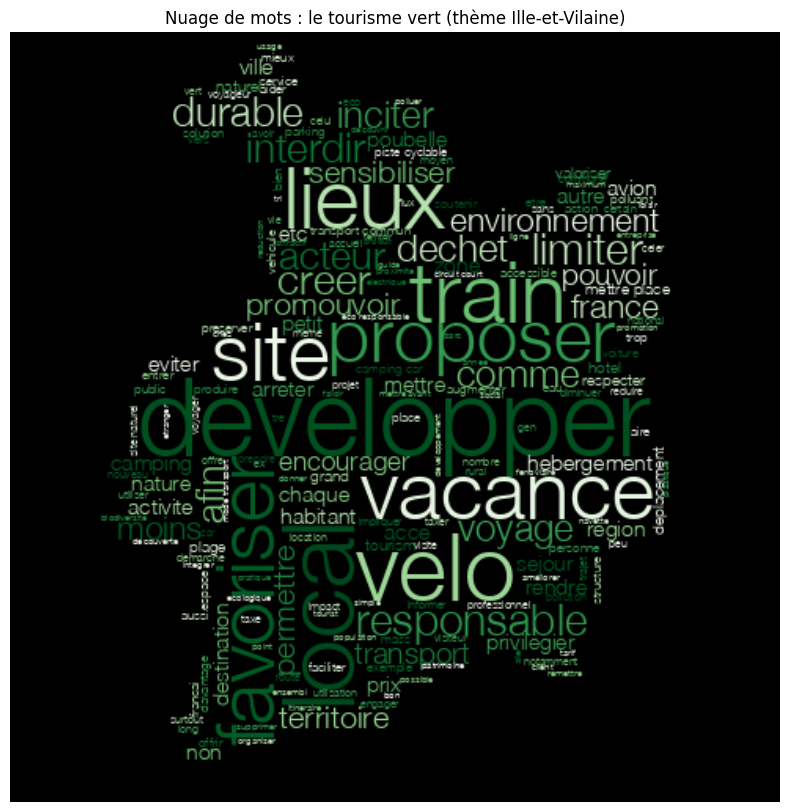

In [58]:
# Afficher le nuage de mots
plt.figure(figsize=(15, 10))  # Taille de l'image plus grande
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title("Nuage de mots : le tourisme vert (thème Ille-et-Vilaine)")
plt.show()

In [59]:
# Sauvegarder le nuage de mots dans un fichier
wc.to_file("nuage_de_mots.png")

# Vectorisation avec word2vec

In [60]:
from gensim.models import Word2Vec

Pour parametrer la fenetre avant / après du word to vec j'utilise la longueur moyenne de ma liste de token /2

In [61]:
# Calculer la longueur moyenne des listes dans la colonne 'tokens_lemmatized'
average_length = df_final['tokens_lemmatized'].apply(len).mean()
average_length

9.784326858673811

# Version C-BOW

In [62]:
import os

In [63]:
cbow_w2v = Word2Vec(sentences=df_final['tokens_lemmatized'], vector_size=20, sg=0, hs=1, window=10)
if not os.path.exists('./WE_models'):
    os.mkdir('./WE_models')
cbow_w2v.save('WE_models/w2v_cbow_20D')

# Test de quelques similarités

In [64]:
cbow_w2v.wv.most_similar('bus')

[('encourager', 0.9950869083404541),
 ('vol', 0.9948517084121704),
 ('faciliter', 0.9942849278450012),
 ('developper', 0.994236171245575),
 ('impact', 0.9939950108528137),
 ('personne', 0.9937992095947266),
 ('doux', 0.9935585856437683),
 ('ville', 0.9935392737388611),
 ('etre', 0.9934711456298828),
 ('velo', 0.9933748841285706)]

In [65]:
df_final['content'].head()

0    Il faut favoriser le stationnement des véhicul...
1    Il faut éviter la course aux équipements et à ...
2    Il faut remettre en service les petites lignes...
3    Il faut taxer de manière significative tous le...
4    Il faut un questionnaire obligatoire à chaque ...
Name: content, dtype: object

In [66]:
cbow_w2v.wv.get_vector("train")

array([ 0.08602295, -0.13050379,  0.1947434 ,  0.5952333 , -0.89285725,
       -0.02172292,  0.24325472,  1.0171328 , -0.56912124,  0.44388473,
        0.7332719 , -1.0207304 ,  0.8920126 , -0.34098485,  1.0964282 ,
        0.8045692 ,  1.0637851 ,  0.01886524, -0.46362913, -1.4381909 ],
      dtype=float32)

# Version Skip-Gram

In [67]:
skgram_w2v = gensim.models.Word2Vec(sentences=df_final['tokens_lemmatized'], vector_size=20, sg=1, hs=1, window=5)
if not os.path.exists('./WE_models'):
    os.mkdir('./WE_models')
skgram_w2v.save('WE_models/w2v_sg_20D')

In [68]:
skgram_w2v.wv.most_similar('dechet')

[('ramasser', 0.9802685379981995),
 ('montrer', 0.9770373106002808),
 ('besoin', 0.9765458703041077),
 ('dechets', 0.9764859080314636),
 ('scolaire', 0.9757699370384216),
 ('amende', 0.9749641418457031),
 ('hotellerie', 0.9746628403663635),
 ('non', 0.9744322896003723),
 ('ramassage', 0.9737995862960815),
 ('etablir', 0.9727495908737183)]

In [69]:
skgram_w2v.wv.get_vector("dechet")

array([ 2.9905993e-01, -3.0647299e-01, -1.1301221e-01,  4.0389073e-01,
       -2.4880451e-01, -1.2965313e-01,  1.8416576e-01,  3.8791201e-01,
       -2.7728051e-01,  1.9700889e-01,  1.3486980e-01, -5.0617284e-01,
       -5.1114064e-02, -6.2781028e-02,  3.7772861e-01,  2.0142388e-01,
        5.5869430e-01,  8.1245385e-02,  4.2769080e-04, -6.6781378e-01],
      dtype=float32)

In [70]:
skgram_w2v.wv.most_similar('bus')

[('amenagement', 0.985682487487793),
 ('periode', 0.9855057001113892),
 ('navette', 0.9854180216789246),
 ('pendant', 0.9849807024002075),
 ('facilement', 0.9807074069976807),
 ('deplacer', 0.9799202084541321),
 ('proximite', 0.9797785878181458),
 ('mobilite', 0.9782407879829407),
 ('internet', 0.9769865274429321),
 ('inspirer', 0.9762657880783081)]

In [71]:
skgram_w2v.wv.most_similar('velo')

[('bus', 0.9694790840148926),
 ('developper', 0.9637236595153809),
 ('depart', 0.9570631384849548),
 ('pendant', 0.9551154971122742),
 ('train', 0.953765869140625),
 ('commun', 0.9510502815246582),
 ('amenagement', 0.9509927034378052),
 ('transformer', 0.9501656889915466),
 ('encore', 0.9492613673210144),
 ('nuit', 0.9483774900436401)]

Je vais garder skip-gram avec une taille de vecteur de 20. en fait, j'ai 1500 a peine propositions donc ça reste assez peu. Ce qui veut dire que mes vecteur doivent etre plus petits qu'à l'habitude.

In [72]:
from sklearn.manifold import TSNE
import plotly.express as px

In [73]:
# Obtenez les vecteurs de mots à partir du modèle Word2Vec
vectors = skgram_w2v.wv.vectors

# Réduire les dimensions à deux dimensions avec t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=5, metric='cosine')
vectors_2d = tsne.fit_transform(vectors)

# Créer un DataFrame avec les vecteurs de mots en deux dimensions
df_vectors = pd.DataFrame(vectors_2d, columns=['x', 'y'])
df_vectors['word'] = skgram_w2v.wv.index_to_key

In [74]:
df_vectors[df_vectors['word'] == 'dechet']

,x,y,word
23,-19.003603,-2.858111,dechet


In [75]:
# Créer un graphique dynamique avec Plotly
fig = px.scatter(df_vectors, x='x', y='y', hover_name='word', color_discrete_sequence=['green'])
fig.update_traces(textposition='top center', showlegend=False)
fig.update_layout(title='Représentation 2D des vecteurs de mots avec t-SNE',
                  xaxis=dict(title='Dimension 1'),
                  yaxis=dict(title='Dimension 2'),
                  hoverlabel=dict(font_size=16),  # Ajuster la taille de la police pour l'étiquette de survol
                  width=900,  # Largeur de la figure en pixels
                  height=900)  # Hauteur de la figure en pixels)
fig.show()

In [ ]:
import plotly.offline as pyo

In [ ]:
# Sauvegarder le graphique en tant que fichier HTML
pyo.plot(fig, filename='representation_2d_mots.html')

# Construction des embedding des propositions

In [76]:
def mean_prop_embedding(tokens, model_w2v):
    # Initialiser une liste pour stocker les embeddings de chaque token
    embedding_list = []
    
    # Parcourir chaque token dans la liste de tokens
    for token in tokens:
        # Vérifier si le token est présent dans les embeddings du modèle
        if token in model_w2v.wv:
            # Ajouter le vecteur d'embedding du token à la liste
            embedding_list.append(model_w2v.wv.get_vector(token))
    
    # Si aucun token n'est présent dans les embeddings, retourner un vecteur nul
    if not embedding_list:
        return np.zeros(model_w2v.vector_size)
    
    # Calculer la moyenne des embeddings
    mean_embedding = np.mean(embedding_list, axis=0)
    
    # Supprimer la liste des embeddings pour libérer de la mémoire
    del embedding_list
    
    return mean_embedding

In [77]:
df_final['embedding_prop'] = df_final['tokens_lemmatized'].apply(lambda x : mean_prop_embedding(x, skgram_w2v))

In [78]:
df_final['embedding_prop'].head()

0    [0.17186114, -0.08845729, -0.11948444, 0.39568...
1    [0.15229386, -0.09251948, -0.10295664, 0.41982...
2    [0.11755041, -0.11832554, -0.08481864, 0.37111...
3    [0.12595959, -0.045971338, -0.0737285, 0.36744...
4    [0.13181931, -0.14983164, -0.16019681, 0.34101...
Name: embedding_prop, dtype: object

In [79]:
df_final['embedding_prop'].iloc[0]

array([ 0.17186114, -0.08845729, -0.11948444,  0.395688  , -0.21071915,
       -0.16457158,  0.19338404,  0.31187618, -0.13607979,  0.18443723,
        0.1498611 , -0.4486511 ,  0.06832573, -0.01391255,  0.38709447,
        0.02340224,  0.55191696, -0.00395686, -0.14463955, -0.6160929 ],
      dtype=float32)

In [80]:
vectors.shape

(639, 20)

In [81]:
# Convertir la colonne 'embedding_prop' en une seule matrice
embedding_matrix = np.stack(df_final['embedding_prop'].values)
embedding_matrix.shape

(1493, 20)

In [82]:
# Réduire les dimensions à deux dimensions avec t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=5, metric='cosine')
df_final[['embedding_prop_x','embedding_prop_y']] = tsne.fit_transform(embedding_matrix)

In [83]:
df_final[['embedding_prop_x','embedding_prop_y']].head()

,embedding_prop_x,embedding_prop_y
0,32.969357,7.015104
1,17.906464,63.347626
2,29.774715,31.701145
3,51.010960,-30.724977
4,24.470331,-43.843040


In [ ]:
# Créer un graphique dynamique avec Plotly
fig = px.scatter(df_final[['content','embedding_prop_x','embedding_prop_y']], x='embedding_prop_x', y='embedding_prop_y', hover_name='content', color_discrete_sequence=['green'])
fig.update_traces(textposition='top center', showlegend=False)
fig.update_layout(title='Représentation 2D des phrases',
                  xaxis=dict(title='Dimension 1'),
                  yaxis=dict(title='Dimension 2'),
                  hoverlabel=dict(font_size=16),  # Ajuster la taille de la police pour l'étiquette de survol
                  width=900,  # Largeur de la figure en pixels
                  height=900)  # Hauteur de la figure en pixels)
fig.show()

In [ ]:
# Sauvegarder le graphique en tant que fichier HTML
pyo.plot(fig, filename='representation_2d_phrases.html')

# Classification non-supervisé

# option 1 K-Means

In [85]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [86]:
# Définir le nombre de clusters
nombre_de_clusters = 10

# Initialiser et entraîner le modèle K-means
kmeans = KMeans(n_clusters=nombre_de_clusters, random_state=42)

In [87]:
kmeans.fit(embedding_matrix)

/home/ensai/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=10, random_state=42)

In [88]:
# Obtenir les labels de cluster pour chaque phrase
labels = kmeans.labels_

# Évaluer la qualité des clusters avec la métrique silhouette
silhouette_avg = silhouette_score(embedding_matrix, labels)
print("Silhouette Score:", silhouette_avg)

# Assigner les labels de cluster à chaque ligne de votre dataframe
df_final['cluster_label'] = labels

Silhouette Score: 0.0968777422676254


In [89]:
df_final['cluster_label'].value_counts()

cluster_label
3    280
8    214
4    198
0    168
2    164
5    151
1    138
9    129
7     50
6      1
Name: count, dtype: int64

In [90]:
# Définir la largeur d'affichage souhaitée (par exemple, 1000)
largeur_affichage = 900

# Appliquer la nouvelle largeur d'affichage
pd.set_option('display.max_colwidth', largeur_affichage)

In [91]:
df_final['content'][df_final['cluster_label'] == 0].sample(20)

873               Il faut instaurer une taxe pour les touristes étrangers pour financer la transition écologique et la protection de l'environnement
1366            Il faut offrir des sas de décompression aux urbains, en pleine nature, loin du tumulte et du WIFI mais avec un bon niveau de confort
130           Il faut accepter la sobriété même pour les vacances et y donner du sens dans un monde bien trop individualiste et bien trop cloisonné.
980                                 Il faut que les enfants dans les colonies de vacances soient initiés à la biodiversité de l’endroit où ils sont.
1196                                    Il faut apprendre à voyager léger avec garde-robe réduite, favoriser achats sur place et faire don au retour
1040                             Il faut faire un classement du voyage/consommation de CO2 pour que les voyageurs réalisent l'impact de leur voyage.
283                                   Il faut impérativement éduquer les écoliers dès le plus jeune âge : 

tourisme zero dechet

In [92]:
df_final['content'][df_final['cluster_label'] == 1].sample(20)

1285            Il faut que chacun ait conscience de son impact environnemental en fonction de son logement de tourisme, son mode de transport, etc.
1415     Il faut un organisme qui collecte les données de transport et itinéraires touristiques afin d'avoir une vision d'ensemble de l'impact écolo
681        Il faut valoriser l'intermodalité touristique, en privilégiant les modes de transport doux ou transport en commun à faible impact en CO2.
346      Il faut déployer de petites lignes de TER sur les territoires ruraux, pour permettre aux citadins de venir facilement en train voire à vélo
362                     Il faut des parkings en périphérie des cités touristiques avec navettes régulières et à petit prix ( ex: Mont Saint Michel )
1073                                                                                   Il faut rétablir les trains de nuit des Alpes disparu en 2016
1226                        Il faut faire des pass voyages illimités transports bus/train à la semaine ou 

Voyager leger / booster les vacances en camping car

In [ ]:
# Créer un graphique dynamique avec Plotly
fig = px.scatter(df_final[['content', 'embedding_prop_x', 'embedding_prop_y', 'cluster_label']], 
                 x='embedding_prop_x', 
                 y='embedding_prop_y', 
                 hover_name='content', 
                 color='cluster_label', 
                 color_continuous_scale='Viridis',  # Choisir une palette de couleurs
                 range_color=[0, df_final['cluster_label'].max()],  # Définir la plage de couleurs en fonction des étiquettes de cluster
                 labels={'cluster_label': 'Cluster Label'},  # Renommer l'étiquette de la légende
                 color_continuous_midpoint=int(df_final['cluster_label'].max() / 2),  # Point médian de la palette de couleurs
                 opacity=0.7)  # Opacité des points

fig.update_traces(textposition='top center', showlegend=False)
fig.update_layout(title='Représentation 2D des Clusters de Phrases',
                  xaxis=dict(title='Dimension 1'),
                  yaxis=dict(title='Dimension 2'),
                  hoverlabel=dict(font_size=16),  # Ajuster la taille de la police pour l'étiquette de survol
                  width=900,  # Largeur de la figure en pixels
                  height=900)  # Hauteur de la figure en pixels)

fig.show()


# On rajoute les 15 mots les plus frequents par clusters pour donner une idée de la thématique

In [ ]:
import pandas as pd
from collections import Counter

# Supposons que df est votre DataFrame avec les colonnes 'cluster' et 'tokens'
# La colonne 'tokens' contient les listes de tokens pour chaque document

# Exemple de DataFrame
# data = {'cluster': [1, 1, 2, 2, 3, 3], 'tokens': [['chat', 'chien'], ['chien', 'souris'], ['chat', 'souris'], ['chien', 'chat'], ['souris', 'chat'], ['chien', 'souris']]}
# df = pd.DataFrame(data)

# Fonction pour obtenir les mots les plus fréquents dans un cluster
def get_top_words(tokens_list, top_n=15):
    all_tokens_fonc = [token for tokens in tokens_list for token in tokens]
    counter = Counter(all_tokens_fonc)
    most_common = counter.most_common(top_n)
    return most_common

# Grouper les tokens par cluster et appliquer la fonction pour obtenir les mots les plus fréquents
top_words_by_cluster = df_final.groupby('cluster_label')['tokens_final'].apply(lambda x: get_top_words(x))

# Convertir le résultat en DataFrame pour une meilleure lisibilité
top_words_df = pd.DataFrame(top_words_by_cluster).reset_index()
top_words_df.columns = ['cluster_label', 'top_words']

# Afficher les mots les plus fréquents pour chaque cluster
for index, row in top_words_df.iterrows():
    print(f"Cluster {row['cluster_label']}:")
    for word, freq in row['top_words']:
        print(f"  {word}: {freq}")
    print()


In [ ]:
top_words_by_cluster

In [ ]:
top_words_df

In [ ]:
# Créer une nouvelle colonne 'top_words' dans df_final
def get_top_words_for_cluster(cluster_label, top_words_df):
    top_words = top_words_df[top_words_df['cluster_label'] == cluster_label]['top_words'].values
    if top_words:
        return ", ".join([word for word, _ in top_words[0]])
    return ""

df_final['top_words'] = df_final['cluster_label'].apply(lambda x: get_top_words_for_cluster(x, top_words_df))

In [ ]:
df_final['top_words'].value_counts()

In [ ]:
# Créer le graphique Plotly avec les mots les plus fréquents comme étiquette de survol
fig = px.scatter(df_final[['content', 'embedding_prop_x', 'embedding_prop_y', 'cluster_label', 'top_words']], 
                 x='embedding_prop_x', 
                 y='embedding_prop_y',
                 hover_name='content', 
                 hover_data={'top_words': True},  # Ajouter les mots les plus fréquents aux données de survol
                 color='cluster_label', 
                 color_continuous_scale='Portland',  # Choisir une palette de couleurs
                 labels={'cluster_label': 'Cluster Label'},  # Renommer l'étiquette de la légende
                 opacity=0.7)  # Opacité des points

fig.update_traces(textposition='top center', showlegend=False)
fig.update_layout(title='Représentation 2D des clusters',
                  xaxis=dict(title='Dimension 1'),
                  yaxis=dict(title='Dimension 2'),
                  hoverlabel=dict(font_size=16))  # Hauteur de la figure en pixels)

fig.show()

In [ ]:
# Sauvegarder le graphique en tant que fichier HTML
pyo.plot(fig, filename='representation_2d_clusters.html')

# CAH

In [94]:
from sklearn.cluster import AgglomerativeClustering

# Créer un objet de classification ascendante hiérarchique
agg_clustering = AgglomerativeClustering(n_clusters=10)

# Adapter le modèle aux données
agg_clustering.fit(embedding_matrix)

# Obtenir les étiquettes des clusters
cluster_labels = agg_clustering.labels_


# Évaluer la qualité des clusters avec la métrique silhouette
silhouette_avg = silhouette_score(embedding_matrix, cluster_labels)
print("Silhouette Score:", silhouette_avg)

# Ajouter les étiquettes des clusters à votre dataframe
df_final['cluster_label_cah'] = cluster_labels


Silhouette Score: 0.0605567622162334


In [95]:
df_final['cluster_label_cah'].value_counts()

cluster_label_cah
0    389
3    246
2    203
1    187
4    162
8    101
9     89
7     70
6     45
5      1
Name: count, dtype: int64

In [96]:
df_final['content'][df_final['cluster_label_cah'] == 0].sample(20)

529         Il faut faire la pédagogie de l'utilisation de l'eau, de l'électricité, du chauffage et de la clim dans les lieux d'accueil et de séjour
131                                Il faut supprimer les péages (bouchons, pollution) mettre en place un système de vignette ou paiement automatique
66      Il faut créer une plateforme commune à notre région type Amazon Local, afin de\n privilégier nos artisans, agriculteurs et commerces locaux.
90        Il faut faire des cartes de fidélité en hôtellerie traditionnelle et de plein air pour inciter les vacanciers à renouveler leurs locations
694                  Il faut voyager mieux même si cela signifie moins, faire payer le vrai prix des vols aériens, augmenter la RSE des entreprises.
544               Il faut que les offices du tourisme éditent un "manuel" didactique englobant les richesses, pratiques/règles du territoire visité.
1319    Il faut apprendre à ceux qui viennent en vacances, à respecter l'environnement où ils se trouvent 

In [ ]:
# Créer un graphique dynamique avec Plotly
fig = px.scatter(df_final[['content', 'embedding_prop_x', 'embedding_prop_y', 'cluster_label_cah']], 
                 x='embedding_prop_x', 
                 y='embedding_prop_y', 
                 hover_name='content', 
                 color='cluster_label_cah', 
                 color_continuous_scale='Viridis',  # Choisir une palette de couleurs
                 range_color=[0, df_final['cluster_label_cah'].max()],  # Définir la plage de couleurs en fonction des étiquettes de cluster
                 labels={'cluster_label': 'Cluster cluster_label_cah'},  # Renommer l'étiquette de la légende
                 color_continuous_midpoint=int(df_final['cluster_label_cah'].max() / 2),  # Point médian de la palette de couleurs
                 opacity=0.7)  # Opacité des points

fig.update_traces(textposition='top center', showlegend=False)
fig.update_layout(title='Représentation 2D des clusters de phrases avec CAH',
                  xaxis=dict(title='Dimension 1'),
                  yaxis=dict(title='Dimension 2'),
                  hoverlabel=dict(font_size=16),  # Ajuster la taille de la police pour l'étiquette de survol
                  width=900,  # Largeur de la figure en pixels
                  height=900)  # Hauteur de la figure en pixels)

fig.show()


In [ ]:
# Sauvegarder le graphique en tant que fichier HTML
pyo.plot(fig, filename='representation_2d_clusters_cah.html')

In [98]:
df_final.head()

,content,agree_count,neutral_count,disagree_count,like_it_count,platitude_agree_count,doable_count,no_opinion_count,do_not_understand_count,do_not_care_count,...,case,tokens_normalized,stop_words,tokens_final,tokens_lemmatized,embedding_prop,embedding_prop_x,embedding_prop_y,cluster_label,cluster_label_cah
0,Il faut favoriser le stationnement des véhicules de loisir proche des sites touristiques au même titre qu'un véhicule léger.,46,38,30,8,2,11,6,13,4,...,"[Min, Min, Min, Min, Min, Min, Min, Min, Min, Min, Min, Min, Min, Min, Min, Min, Min, Min, Min, Min]","[favoriser, le, stationnement, des, vehicules, de, loisir, proche, des, sites, touristiques, au, meme, titre, qu, un, vehicule, leger]","[il, le, des, de, des, au, qu, un]","[favoriser, stationnement, vehicule, loisir, proche, site, mem, titre, vehicule, leger]","[favoriser, stationnement, vehicule, loisir, proche, site, touristique, mem, titre, vehicule, leger]","[0.17186114, -0.08845729, -0.11948444, 0.395688, -0.21071915, -0.16457158, 0.19338404, 0.31187618, -0.13607979, 0.18443723, 0.1498611, -0.4486511, 0.06832573, -0.013912547, 0.38709447, 0.023402236, 0.55191696, -0.0039568637, -0.14463955, -0.6160929]",32.969357,7.015104,2,0
1,Il faut éviter la course aux équipements et à la densification des offres d’hébergement dans les campings,52,28,33,9,2,14,7,6,1,...,"[Min, Min, Min, Min, Min, Min, Min, Min, Min, Min, Min, Min, Min, Min, Min, Min, Min, Min, Min]","[eviter, la, course, aux, equipements, et, la, densification, des, offres, hebergement, dans, les, campings]","[il, la, aux, et, la, des, dans, les]","[eviter, course, equipement, densification, offre, hebergemer, camping]","[eviter, course, equipement, densification, offre, hebergemer, camping]","[0.15229386, -0.09251948, -0.10295664, 0.419823, -0.28400192, -0.17534748, 0.2562632, 0.29268226, -0.17876276, 0.0786175, 0.15587984, -0.41220695, 0.029297862, -0.011763618, 0.3329011, 0.0510891, 0.4764212, -0.015392932, -0.2190417, -0.6003817]",17.906464,63.347626,5,2
2,Il faut remettre en service les petites lignes SNCF intérieures que l'on ferme depuis plusieurs années,591,96,90,166,23,142,37,6,12,...,"[Min, Min, Min, Min, Min, Min, Min, Min, Maj, Min, Min, Min, Min, Min, Min, Min]","[remettre, en, service, les, petites, lignes, sncf, interieures, que, on, ferme, depuis, plusieurs, annees]","[il, en, les, que, on]","[remettre, service, petit, ligne, sncf, interieure, ferme, depuis, plusieurs, annee]","[remettre, service, petit, ligne, sncf, interieure, ferme, depuis, plusieurs, annee]","[0.11755041, -0.11832554, -0.08481864, 0.371117, -0.2738945, -0.15538684, 0.2451752, 0.32754275, -0.15685779, 0.13454907, 0.195342, -0.41456014, 0.027218396, 0.004356857, 0.37016666, 0.07556458, 0.40691173, -0.0050445097, -0.1745161, -0.59547055]",29.774715,31.701145,5,2
3,Il faut taxer de manière significative tous les vols courts nationaux (sauf si le trajet concerné n'existe pas en train).,91,24,36,26,5,31,5,2,1,...,"[Min, Min, Min, Min, Min, Min, Min, Min, Min, Min, Min, Min, Min, Min, Min, Min, Min, Min, Min, Min, Min, Min, Min]","[taxer, de, maniere, significative, tous, les, vols, courts, nationaux, sauf, si, le, trajet, concerne, existe, pas, en, train]","[il, de, les, le, pas, en]","[taxer, manier, significatif, vol, court, national, sauf, si, trajet, concerner, exister, train]","[taxer, manier, significatif, tout, vol, court, national, sauf, si, trajet, concerner, exister, train]","[0.12595959, -0.045971338, -0.0737285, 0.3674469, -0.22393273, -0.15537976, 0.2678548, 0.37095907, -0.14499651, 0.20639156, 0.1751339, -0.4164212, 0.041715257, -0.025820632, 0.39499104, -0.06441075, 0.4749223, 0.032832745, -0.21919756, -0.6622155]",51.010960,-30.724977,2,1
4,Il faut un questionnaire obligatoire à chaque réservation qui informe le client de l’empreinte carbone de ses prochaines vacances.,70,53,77,11,8,25,15,2,7,...,"[Min, Min, Min, Min, Min, Min, Min, Min, Min, Min, Min, Min, Min, Min, Min, Min, Min, Min, Min, Min, Min, Min]","[un, q

# Methode specifique : Grid search qui optimise la metrique silhouette avec la technique hdbscan

## Résumé de la méthode HDBSCAN
HDBSCAN (Hierarchical Density-Based Spatial Clustering of Applications with Noise) est une méthode de clustering non supervisée basée sur la densité, qui peut identifier des clusters de densité variable et marquer les points qui ne font pas partie de clusters comme du bruit (outliers). HDBSCAN est une extension de DBSCAN, et contrairement à DBSCAN, il ne nécessite pas de spécifier un seul paramètre de densité (epsilon) et est capable de gérer des clusters de différentes densités de manière plus robuste.

### Fonctionnement global de HDBSCAN
Construction de l'arbre de MST (Minimum Spanning Tree) :
HDBSCAN commence par construire un arbre couvrant minimal pondéré à partir des données en utilisant une distance de type k-distance. Cet arbre capture les relations de proximité entre les points.

### Condensation de l'arbre :
HDBSCAN condense cet arbre en supprimant progressivement les bords les moins denses (ceux qui relient les points les plus éloignés), ce qui permet de détecter des clusters naturels dans les données.

### Extraction des clusters :
Les clusters sont extraits de cet arbre condensé en cherchant les regroupements de points ayant une densité suffisante.

### Attribution de labels et détection des outliers :
Les points qui ne sont pas assez proches de leurs voisins pour appartenir à un cluster sont marqués comme outliers.

### Paramètres de HDBSCAN
Voici les principaux paramètres de HDBSCAN que vous pouvez optimiser avec une recherche par grille :
- min_cluster_size :  
    C'est la taille minimale d'un cluster. Cela détermine le nombre minimum de points nécessaires pour former un cluster dense.  
    Un plus grand min_cluster_size peut rendre l'algorithme moins sensible aux petits clusters et réduire le bruit, tandis qu'un plus petit min_cluster_size peut détecter plus de petits clusters.

- min_samples :
    C'est le nombre minimum de points dans le voisinage d'un point pour qu'il soit considéré comme un noyau de cluster. Par défaut, min_samples est égal à min_cluster_size, mais il peut être ajusté indépendamment.  
    Un plus grand min_samples augmente la robustesse contre le bruit mais peut nécessiter des clusters plus denses pour être détectés.

- metric :
    La métrique de distance utilisée pour calculer les distances entre les points (par exemple, 'euclidean', 'manhattan', etc.).  
    La métrique de distance choisie peut influencer la forme et la taille des clusters détectés. Le choix de la métrique dépend de la nature des données et des relations que vous souhaitez capturer.

## Qu'est-ce que le Silhouette Score ?
Le Silhouette Score est une métrique utilisée pour évaluer la qualité des clusters dans un ensemble de données. Il mesure à quel point un point de données est bien associé à son propre cluster par rapport aux autres clusters. La silhouette d'un point de données est une combinaison de deux scores :

Cohésion (a) : La distance moyenne entre un point et tous les autres points du même cluster.
Séparation (b) : La distance moyenne entre un point et tous les points du cluster le plus proche auquel il n'appartient pas.
La silhouette pour un point de données est définie comme suit :

$$\ s = \frac{b - a}{\max(a, b)} \$$

où :

- \( a \) est la distance moyenne entre le point et les autres points du même cluster (Cohésion).
- \( b \) est la distance moyenne entre le point et les points du cluster le plus proche qui n'est pas son propre cluster (Séparation).

Le Silhouette Score global pour un ensemble de données est la moyenne des silhouettes de tous les points de données.

### Interprétation du Silhouette Score
1 : Le point est bien attribué à son propre cluster et est loin des autres clusters.  
0 : Le point se trouve à la frontière entre deux clusters.  
-1 : Le point est mal attribué à un cluster et devrait plutôt appartenir à un autre cluster.


### Utilisation pratique du Silhouette Score
Le Silhouette Score est particulièrement utile pour :
- Évaluer le nombre de clusters :
    * Comparer les Silhouette Scores pour différents nombres de clusters peut aider à déterminer le nombre optimal de clusters.
    
    * Comparer des algorithmes de clustering : Permet de comparer la qualité des clusters formés par différents algorithmes de clustering.

### Exécution de la Grid Search pour optimiser la silhouette
L'objectif de la recherche par grille (Grid Search) est de trouver la meilleure combinaison de ces paramètres en maximisant une métrique de performance, telle que le score de silhouette. Voici un exemple de code pour effectuer cette optimisation :

## Bibliotheques necessaires

In [99]:
from sklearn.cluster import HDBSCAN
import numpy as np
from sklearn.metrics import silhouette_score

## Définition des plages de paramètres et initialisation

In [100]:
# Suppose que vectors est votre ensemble de vecteurs
# Paramètres à tester

min_samples_values = 6

min_cluster_size_values = range(3,10,1)
max_cluster_size_values = range(200,500,5)
metric_values = ['euclidean', 'manhattan']

# Variables pour stocker les meilleurs paramètres et le score correspondant
best_score = -1
best_params = {}

# encadrement du nombre de cluster
min_clusters_required = 5
max_clusters_required = 20

# Facteur de pondération pour la pénalisation des points de bruit
alpha = 2

## Grid search

In [101]:
for min_cluster_size in min_cluster_size_values:
    for max_cluster_size in max_cluster_size_values:
        for metric in metric_values:
            # Initialiser HDBSCAN avec les paramètres actuels
            clusterer = HDBSCAN(min_cluster_size=min_cluster_size,
                            max_cluster_size=max_cluster_size,
                            min_samples = min_samples_values,
                            metric=metric)
            # Ajuster le modèle
            cluster_labels = clusterer.fit_predict(embedding_matrix)

            # Compter le nombre de points de bruit (-1)
            num_noise_points = np.sum(cluster_labels == -1)
            
            # Nombre total de point
            total_points = len(cluster_labels)

            # Compter le nombre de clusters formés (ignorer les points de bruit avec le label -1)
            unique_labels = set(cluster_labels)
            if -1 in unique_labels:
                unique_labels.remove(-1)
            num_clusters = len(unique_labels)
            
            # Vérifier si le nombre de clusters est dans les bornes spécifiées
            if min_clusters_required <= num_clusters <= max_clusters_required:
                valid_labels = cluster_labels[cluster_labels >= 0]
                valid_vectors = embedding_matrix[cluster_labels >= 0]

                # Score silhouette moyen
                silhouette_avg = silhouette_score(valid_vectors, valid_labels)
                # Penalité du au nombre de points isolés
                noise_penalty = alpha * (num_noise_points / total_points)
                # metric àf" optimiser
                composite_score = silhouette_avg - noise_penalty

                print(f"Params: min_cluster_size={min_cluster_size}, metric={metric},"
                    f"Composite Score={composite_score}, Silhouette Score={silhouette_avg},"
                    f"Number of Clusters={num_clusters}, Number of Noise Points={num_noise_points}")
                # Vérifier si c'est le meilleur score
                if composite_score > best_score:
                    best_score = composite_score
                    best_params = {
                        'min_cluster_size': min_cluster_size,
                        'max_cluster_size': max_cluster_size,
                        'metric': metric
                    }

print("Meilleurs paramètres : ", best_params)
print("Meilleur score de silhouette : ", best_score)

Params: min_cluster_size=3, metric=euclidean,Composite Score=-1.6338059614342266, Silhouette Score=0.22553764204869364,Number of Clusters=8, Number of Noise Points=1388
Params: min_cluster_size=3, metric=manhattan,Composite Score=-1.724381844201225, Silhouette Score=0.14433885238283403,Number of Clusters=5, Number of Noise Points=1395
Params: min_cluster_size=3, metric=euclidean,Composite Score=-1.6338059614342266, Silhouette Score=0.22553764204869364,Number of Clusters=8, Number of Noise Points=1388


Params: min_cluster_size=3, metric=manhattan,Composite Score=-1.724381844201225, Silhouette Score=0.14433885238283403,Number of Clusters=5, Number of Noise Points=1395
Params: min_cluster_size=3, metric=euclidean,Composite Score=-1.6338059614342266, Silhouette Score=0.22553764204869364,Number of Clusters=8, Number of Noise Points=1388
Params: min_cluster_size=3, metric=manhattan,Composite Score=-1.724381844201225, Silhouette Score=0.14433885238283403,Number of Clusters=5, Number of Noise Points=1395
Params: min_cluster_size=3, metric=euclidean,Composite Score=-1.6338059614342266, Silhouette Score=0.22553764204869364,Number of Clusters=8, Number of Noise Points=1388
Params: min_cluster_size=3, metric=manhattan,Composite Score=-1.724381844201225, Silhouette Score=0.14433885238283403,Number of Clusters=5, Number of Noise Points=1395
Params: min_cluster_size=3, metric=euclidean,Composite Score=-1.6338059614342266, Silhouette Score=0.22553764204869364,Number of Clusters=8, Number of Noise P

## Test et affichage de cette technique de clustering

In [102]:
# Initialiser HDBSCAN avec les paramètres actuels
best_hdbscan = HDBSCAN( min_cluster_size=3,
                        max_cluster_size = 200,
                        min_samples=6)
# Ajuster le modèle
cluster_labels = best_hdbscan.fit_predict(embedding_matrix)

# Ajouter les étiquettes des clusters à votre dataframe
df_final['cluster_label_hdbscan'] = cluster_labels

In [103]:
df_final['cluster_label_hdbscan'].value_counts()

cluster_label_hdbscan
-1    1388
 6      73
 2       6
 0       5
 4       5
 3       5
 7       4
 5       4
 1       3
Name: count, dtype: int64

In [ ]:
# Créer un graphique dynamique avec Plotly
fig = px.scatter(df_final[['content', 'embedding_prop_x', 'embedding_prop_y', 'cluster_label_hdbscan']], 
                 x='embedding_prop_x', 
                 y='embedding_prop_y', 
                 hover_name='content', 
                 color='cluster_label_hdbscan', 
                 color_continuous_scale='Viridis',  # Choisir une palette de couleurs
                 range_color=[0, df_final['cluster_label_hdbscan'].max()],  # Définir la plage de couleurs en fonction des étiquettes de cluster
                 labels={'cluster_label': 'cluster_label_hdbscan'},  # Renommer l'étiquette de la légende
                 color_continuous_midpoint=int(df_final['cluster_label_hdbscan'].max() / 2),  # Point médian de la palette de couleurs
                 opacity=0.7)  # Opacité des points

fig.update_traces(textposition='top center', showlegend=False)
fig.update_layout(title='Représentation 2D des clusters avec HDBSCAN',
                  xaxis=dict(title='Dimension 1'),
                  yaxis=dict(title='Dimension 2'),
                  hoverlabel=dict(font_size=16),  # Ajuster la taille de la police pour l'étiquette de survol
                  width=900,  # Largeur de la figure en pixels
                  height=900)  # Hauteur de la figure en pixels)

fig.show()


Cette technique n'est pas interessante ici.

## Grid search de k-means

In [105]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [106]:
# Paramètres à tester dans la recherche par grille
n_clusters_values = range(3,40,1)  # Nombre de clusters à tester
random_state = 42  # Seed aléatoire pour l'initialisation

# Variables pour stocker les meilleurs paramètres et le score correspondant
best_score = -1
best_params = {}

In [107]:
for n_clusters in n_clusters_values:
    # Initialiser KMeans avec les paramètres actuels
    kmeans = KMeans(n_clusters=n_clusters, random_state=random_state)
    # Ajuster le modèle
    cluster_labels = kmeans.fit_predict(embedding_matrix)

    # Calculer le score de silhouette
    silhouette_avg = silhouette_score(embedding_matrix, cluster_labels)

    # Afficher les résultats
    print(f"Params: n_clusters={n_clusters}, random_state={random_state}, Silhouette Score={silhouette_avg}")

    # Vérifier si c'est le meilleur score
    if silhouette_avg > best_score:
        best_score = silhouette_avg
        best_params = {
            'n_clusters': n_clusters,
            'random_state': random_state
        }

print("Meilleurs paramètres : ", best_params)
print("Meilleur score de silhouette : ", best_score)


/home/ensai/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Params: n_clusters=3, random_state=42, Silhouette Score=0.1198989843808576


/home/ensai/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Params: n_clusters=4, random_state=42, Silhouette Score=0.10726535581548714


/home/ensai/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Params: n_clusters=5, random_state=42, Silhouette Score=0.09786549967652247


/home/ensai/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Params: n_clusters=6, random_state=42, Silhouette Score=0.09928300095070137


/home/ensai/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Params: n_clusters=7, random_state=42, Silhouette Score=0.09074862954536214


/home/ensai/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Params: n_clusters=8, random_state=42, Silhouette Score=0.09760152127074671


/home/ensai/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Params: n_clusters=9, random_state=42, Silhouette Score=0.09759258674532709


/home/ensai/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Params: n_clusters=10, random_state=42, Silhouette Score=0.0968777422676254


/home/ensai/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Params: n_clusters=11, random_state=42, Silhouette Score=0.09904628028548267


/home/ensai/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Params: n_clusters=12, random_state=42, Silhouette Score=0.09176857290373727


/home/ensai/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Params: n_clusters=13, random_state=42, Silhouette Score=0.09511407125897879


/home/ensai/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Params: n_clusters=14, random_state=42, Silhouette Score=0.09692056045100815


/home/ensai/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Params: n_clusters=15, random_state=42, Silhouette Score=0.09098327333279414


/home/ensai/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Params: n_clusters=16, random_state=42, Silhouette Score=0.09171762440408404


/home/ensai/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Params: n_clusters=17, random_state=42, Silhouette Score=0.09539940679962651


/home/ensai/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Params: n_clusters=18, random_state=42, Silhouette Score=0.09010172497247405


/home/ensai/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Params: n_clusters=19, random_state=42, Silhouette Score=0.08762285925621001


/home/ensai/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Params: n_clusters=20, random_state=42, Silhouette Score=0.09295882529016271


/home/ensai/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Params: n_clusters=21, random_state=42, Silhouette Score=0.0904036980894279


/home/ensai/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Params: n_clusters=22, random_state=42, Silhouette Score=0.08921286798230751


/home/ensai/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Params: n_clusters=23, random_state=42, Silhouette Score=0.09267963736438539


/home/ensai/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Params: n_clusters=24, random_state=42, Silhouette Score=0.08512076434142683


/home/ensai/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Params: n_clusters=25, random_state=42, Silhouette Score=0.08866521197826346


/home/ensai/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Params: n_clusters=26, random_state=42, Silhouette Score=0.0870884140622823


/home/ensai/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Params: n_clusters=27, random_state=42, Silhouette Score=0.08671629611257604


/home/ensai/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Params: n_clusters=28, random_state=42, Silhouette Score=0.08428930772856091


/home/ensai/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Params: n_clusters=29, random_state=42, Silhouette Score=0.08398718966269604


/home/ensai/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Params: n_clusters=30, random_state=42, Silhouette Score=0.08623136807929085


/home/ensai/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Params: n_clusters=31, random_state=42, Silhouette Score=0.0816814849067067


/home/ensai/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Params: n_clusters=32, random_state=42, Silhouette Score=0.08362662684234724


/home/ensai/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Params: n_clusters=33, random_state=42, Silhouette Score=0.0849315080948565


/home/ensai/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Params: n_clusters=34, random_state=42, Silhouette Score=0.08259381920789638


/home/ensai/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Params: n_clusters=35, random_state=42, Silhouette Score=0.08067665696691792


/home/ensai/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Params: n_clusters=36, random_state=42, Silhouette Score=0.08210993470285133


/home/ensai/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Params: n_clusters=37, random_state=42, Silhouette Score=0.08027074760910698


/home/ensai/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Params: n_clusters=38, random_state=42, Silhouette Score=0.08360084713548793


/home/ensai/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Params: n_clusters=39, random_state=42, Silhouette Score=0.0802584304855416
Meilleurs paramètres :  {'n_clusters': 3, 'random_state': 42}
Meilleur score de silhouette :  0.1198989843808576


Top 5 des meilleurs silhouette :
3 clusters
4 clusters
6 clusters
11 clusters
5 clusters

In [108]:
kmeans = KMeans(n_clusters=3, random_state=42)

kmeans.fit(embedding_matrix)

# Obtenir les labels de cluster pour chaque phrase
labels = kmeans.labels_

# Évaluer la qualité des clusters avec la métrique silhouette
silhouette_avg = silhouette_score(embedding_matrix, labels)
print("Silhouette Score:", silhouette_avg)

# Assigner les labels de cluster à chaque ligne de votre dataframe
df_final['cluster_label_best'] = labels

/home/ensai/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Silhouette Score: 0.1198989843808576


In [109]:
df_final['cluster_label_best'].value_counts()

cluster_label_best
0    704
2    476
1    313
Name: count, dtype: int64

In [ ]:
# Créer un graphique dynamique avec Plotly
fig = px.scatter(df_final[['content', 'embedding_prop_x', 'embedding_prop_y', 'cluster_label_best']], 
                 x='embedding_prop_x', 
                 y='embedding_prop_y', 
                 hover_name='content', 
                 color='cluster_label_best', 
                 color_continuous_scale='Viridis',  # Choisir une palette de couleurs
                 range_color=[0, df_final['cluster_label_best'].max()],  # Définir la plage de couleurs en fonction des étiquettes de cluster
                 labels={'cluster_label': 'cluster_label_best'},  # Renommer l'étiquette de la légende
                 color_continuous_midpoint=int(df_final['cluster_label_best'].max() / 2),  # Point médian de la palette de couleurs
                 opacity=0.7)  # Opacité des points

fig.update_traces(textposition='top center', showlegend=False)
fig.update_layout(title='Représentation 2D des clusters avec KMeans',
                  xaxis=dict(title='Dimension 1'),
                  yaxis=dict(title='Dimension 2'),
                  hoverlabel=dict(font_size=16),  # Ajuster la taille de la police pour l'étiquette de survol
                  width=900,  # Largeur de la figure en pixels
                  height=900)  # Hauteur de la figure en pixels)

fig.show()


Moins interessant. voir si avec un nombre de thematique de 11 ce ne serait pas mieux

## LDA avec les differents nombre de clusters finalement retenus

In [111]:
import gensim
from gensim.corpora import Dictionary

In [112]:
# Convertir les données de tokens en une liste de listes de tokens
processed_docs = df_final['tokens_final'].tolist()

# Créer un dictionnaire à partir des tokens
dictionary = Dictionary(processed_docs)

In [113]:
# Filtrer les tokens extrêmes
dictionary.filter_extremes(no_below=15, no_above=0.1, keep_n=1000)

In [114]:
# Convertir les documents en sacs de mots (Bag Of Words)
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

In [115]:
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics = 10, id2word = dictionary, passes = 50)

In [202]:
topics = []
for idx, topic in lda_model.print_topics(-1) :
    print("Topic: {} -> Words: {}".format(idx, topic))
    topics.append(topic)

Topic: 0 -> Words: 0.069*"territoire" + 0.059*"environnement" + 0.054*"hebergement" + 0.053*"piste" + 0.050*"offrir" + 0.046*"privilegier" + 0.045*"cyclable" + 0.044*"developper" + 0.043*"ville" + 0.037*"circuit"
Topic: 1 -> Words: 0.090*"developper" + 0.087*"pouvoir" + 0.073*"voyage" + 0.065*"etre" + 0.043*"vol" + 0.041*"national" + 0.039*"bon" + 0.032*"petit" + 0.030*"prendre" + 0.029*"impliquer"
Topic: 2 -> Words: 0.135*"train" + 0.057*"transport" + 0.056*"moins" + 0.047*"velo" + 0.039*"permettre" + 0.034*"rendre" + 0.033*"accessible" + 0.032*"voiture" + 0.028*"trajet" + 0.028*"avion"
Topic: 3 -> Words: 0.066*"arreter" + 0.053*"velo" + 0.046*"destination" + 0.046*"bien" + 0.044*"promouvoir" + 0.044*"developper" + 0.042*"soutenir" + 0.042*"nature" + 0.038*"meme" + 0.038*"commun"
Topic: 4 -> Words: 0.099*"camping" + 0.083*"lieux" + 0.075*"site" + 0.063*"car" + 0.050*"creer" + 0.049*"naturel" + 0.037*"accueil" + 0.037*"parking" + 0.027*"eviter" + 0.023*"commune"
Topic: 5 -> Words: 0.13

In [188]:
from gensim.models import CoherenceModel

In [189]:
coherence_model_lda = CoherenceModel(model=lda_model, texts=processed_docs, dictionary=dictionary)
coherence_lda = coherence_model_lda.get_coherence()
print('Coherence Score: ', coherence_lda)

Coherence Score:  0.34924060658529543


In [190]:
all_topic_model = []
for i in range(len(topics)):
  str = topics[i].split(' + ')
  topic_model = []
  for j in range(10):
    weight = str[j][0:5]
    word = str[j][7:len(str[j])-1]
    topic_model.append((weight, word))
  all_topic_model.append(topic_model)

In [191]:
all_topic_model

[[('0.069', 'territoire'),
  ('0.059', 'environnement'),
  ('0.054', 'hebergement'),
  ('0.053', 'piste'),
  ('0.050', 'offrir'),
  ('0.046', 'privilegier'),
  ('0.045', 'cyclable'),
  ('0.044', 'developper'),
  ('0.043', 'ville'),
  ('0.037', 'circuit')],
 [('0.090', 'developper'),
  ('0.087', 'pouvoir'),
  ('0.073', 'voyage'),
  ('0.065', 'etre'),
  ('0.043', 'vol'),
  ('0.041', 'national'),
  ('0.039', 'bon'),
  ('0.032', 'petit'),
  ('0.030', 'prendre'),
  ('0.029', 'impliquer')],
 [('0.135', 'train'),
  ('0.057', 'transport'),
  ('0.056', 'moins'),
  ('0.047', 'velo'),
  ('0.039', 'permettre'),
  ('0.034', 'rendre'),
  ('0.033', 'accessible'),
  ('0.032', 'voiture'),
  ('0.028', 'trajet'),
  ('0.028', 'avion')],
 [('0.066', 'arreter'),
  ('0.053', 'velo'),
  ('0.046', 'destination'),
  ('0.046', 'bien'),
  ('0.044', 'promouvoir'),
  ('0.044', 'developper'),
  ('0.042', 'soutenir'),
  ('0.042', 'nature'),
  ('0.038', 'meme'),
  ('0.038', 'commun')],
 [('0.099', 'camping'),
  ('0.08

In [121]:
import pyLDAvis.gensim_models

In [195]:
pyLDAvis.enable_notebook()
pyLDAvis.gensim_models.prepare(lda_model, bow_corpus, dictionary)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.158211 -0.059351       1        1  11.515741
4      0.224667  0.056064       2        1  11.357637
6     -0.174406  0.166758       3        1  11.251272
9      0.155119 -0.198201       4        1  10.169779
8     -0.167627 -0.166017       5        1  10.026132
5     -0.109965 -0.149527       6        1   9.758352
3     -0.042786  0.199786       7        1   9.422382
0      0.092505  0.171211       8        1   9.405984
1     -0.045543  0.033226       9        1   8.904133
7      0.226248 -0.053948      10        1   8.188588, topic_info=            Term        Freq       Total Category  logprob  loglift
60        mettre   88.000000   88.000000  Default  30.0000  30.0000
12         train   96.000000   96.000000  Default  29.0000  29.0000
40         local  130.000000  130.000000  Default  28.0000  28.0000
113  responsable   79.000000   79.000000  Default  27.0000  27.0000
109        place   60.000000   60.000000  Default  26.0000  26.0000
..           ...         ...         ...      ...      ...      ...
133      surtout    2.947151   19.557227  Topic10  -5.1382   0.6099
140     solution    3.972302   26.386086  Topic10  -4.8397   0.6089
80      personne    3.555253   25.346492  Topic10  -4.9506   0.5382
23         autre    4.311218   38.960012  Topic10  -4.7578   0.3011
4         eviter    3.411402   31.826198  Topic10  -4.9919   0.2693

[371 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
22        5  0.983229        acce
126       1  0.786947  accessible
126       7  0.032789  accessible
126      10  0.163947  accessible
37        2  0.972021     accueil
...     ...       ...         ...
183       8  0.323759    voyageur
134       2  0.366473        zone
134       4  0.274854        zone
134       7  0.305394        zone
134       9  0.030539        zone

[528 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 5, 7, 10, 9, 6, 4, 1, 2, 8])

a tester avec 3, 4, 7, 5 topic pour voir et commenter

In [203]:
# Créer une liste pour stocker les topics dominants de chaque document
dominant_topics = []

# Pour chaque document dans le corpus
for doc in bow_corpus:
    # Obtenir les topics du document avec leurs probabilités
    topics = lda_model.get_document_topics(doc, minimum_probability=0.0)
    # Si des topics sont disponibles pour le document
    if topics:
        # Trier les topics par probabilité et obtenir le topic le plus probable
        dominant_topic = max(topics, key=lambda x: x[1])[0]
        dominant_topics.append(dominant_topic)
    else:
        # Si aucun topic n'est disponible pour le document, attribuer -1
        dominant_topics.append(-1)

# check sur la derniere ligne
print(topics)
print(dominant_topic)  

[(0, 0.033333566), (1, 0.033333566), (2, 0.033333566), (3, 0.033333566), (4, 0.033333566), (5, 0.033333566), (6, 0.03333417), (7, 0.36666846), (8, 0.033333566), (9, 0.3666624)]
7


In [199]:
# Ajouter les topics dominants à votre DataFrame
df_final['dominant_topic'] = dominant_topics

In [200]:
df_final['dominant_topic'].value_counts()

dominant_topic
6    190
4    178
9    164
5    152
0    148
3    146
2    143
8    133
1    128
7    111
Name: count, dtype: int64

In [ ]:
# Créer un graphique dynamique avec Plotly
fig = px.scatter(df_final[['content', 'embedding_prop_x', 'embedding_prop_y', 'dominant_topic']], 
                 x='embedding_prop_x', 
                 y='embedding_prop_y', 
                 hover_name='content', 
                 color='dominant_topic', 
                 color_continuous_scale='Viridis',  # Choisir une palette de couleurs
                 range_color=[0, df_final['dominant_topic'].max()],  # Définir la plage de couleurs en fonction des étiquettes de cluster
                 labels={'cluster_label': 'dominant_topic'},  # Renommer l'étiquette de la légende
                 color_continuous_midpoint=int(df_final['dominant_topic'].max() / 2),  # Point médian de la palette de couleurs
                 opacity=0.7)  # Opacité des points

fig.update_traces(textposition='top center', showlegend=False)
fig.update_layout(title='Représentation 2D des topics dominants',
                  xaxis=dict(title='Dimension 1'),
                  yaxis=dict(title='Dimension 2'),
                  hoverlabel=dict(font_size=16),  # Ajuster la taille de la police pour l'étiquette de survol
                  width=900,  # Largeur de la figure en pixels
                  height=900)  # Hauteur de la figure en pixels)

fig.show()


In [147]:
df_final['content'][df_final['dominant_topic'] == 1].sample(50)

413                                                                                     Il faut développer le covoiturage sur les lieux de vacances.
1004                                         Il faut développer les voyages en montgolfière, pédalo, cyclo-draisine (sur les anciens chemins de fer)
510                                         Il faut que le tourisme puisse être pour tous, que l’ensemble des clientèles puissent partir en vacances
694                  Il faut voyager mieux même si cela signifie moins, faire payer le vrai prix des vols aériens, augmenter la RSE des entreprises.
322                 Il faut intégrer une charte de bonne conduite touristique à intégrer aux guides touristiques. Cette charte doit être un exemple.
492                                                        Il faut développer les déplacements en train entre régions et supprimer les vols internes
857     Il faut ne pas confondre écologie et pourrir la vie des petits. Un camping-cariste avec son diesel

In [184]:
# Calculer la proportion moyenne d'agree_count
total_counts = df_final[['agree_count', 'neutral_count', 'disagree_count']].sum()
total_agree_proportion = np.multiply(np.divide(total_counts['agree_count'],total_counts.sum()), 100)

# Grouper par topic et calculer les sommes des counts
grouped_df = df_final.groupby(['dominant_topic']).agg({
    'agree_count': 'sum',
    'neutral_count': 'sum',
    'disagree_count': 'sum'
})

# Ajouter une colonne pour la proportion d'agree_count par rapport au total des counts pour chaque topic
grouped_df['agree_proportion_percent'] = grouped_df.apply(lambda x: np.multiply(np.divide(x['agree_count'], x[['agree_count', 'neutral_count', 'disagree_count']].sum()),100), axis=1)

# Comparer la proportion moyenne avec celle de chaque topic
grouped_df['difference_from_average_percent'] = grouped_df['agree_proportion_percent'] - total_agree_proportion

grouped_df

,agree_count,neutral_count,disagree_count,agree_proportion_percent,difference_from_average_percent
dominant_topic,,,,,
0,27744,5528,3959,74.518546,3.740424
1,14572,3964,4543,63.139651,-7.638472
2,25499,5234,6152,69.131083,-1.647040
3,19175,3965,3584,71.751983,0.973861
4,24324,5457,4842,70.253877,-0.524245
5,19252,4588,5196,66.303899,-4.474224
6,27414,5692,4502,72.894065,2.115942
7,14723,2960,2418,73.245112,2.466990
8,16879,3857,3598,69.363853,-1.414270


In [ ]:
# Calculer la proportion moyenne d'agree_count
total_counts = df_final[['agree_count', 'neutral_count', 'disagree_count']].sum()
total_agree_proportion = np.multiply(np.divide(total_counts['agree_count'],total_counts.sum()), 100)

# Grouper par topic et calculer les sommes des counts
grouped_df_cluster = df_final.groupby(['cluster_label']).agg({
    'content' : 'count',
    'agree_count': 'sum',
    'neutral_count': 'sum',
    'disagree_count': 'sum'
})

# Ajouter une colonne pour la proportion d'agree_count par rapport au total des counts pour chaque topic
grouped_df_cluster['agree_proportion_percent'] = grouped_df_cluster.apply(lambda x: np.multiply(np.divide(x['agree_count'], x[['agree_count', 'neutral_count', 'disagree_count']].sum()),100), axis=1)

# Comparer la proportion moyenne avec celle de chaque topic
grouped_df_cluster['difference_from_average_percent'] = grouped_df_cluster['agree_proportion_percent'] - total_agree_proportion

grouped_df_cluster

In [ ]:
df_final['cluster_label'].value_counts()

In [ ]:
cluster_counts = df_final['cluster_label'].value_counts().reset_index()
cluster_counts.columns = ['cluster_label', 'count']

In [ ]:
fig = px.pie(cluster_counts,
             values = 'count',
             names = 'cluster_label',
             title = 'Distribution des Clusters',
             color_discrete_sequence = px.colors.sequential.Greens,
             hole=0.3,
             labels=cluster_counts['cluster_label'],  # Afficher les labels des clusters sur le camembert
        )

# Enlever la légende
fig.update_layout(showlegend=False)
# Ajouter les labels des clusters sur le camembert
fig.update_traces(textposition='inside', textinfo='label+percent+value')

fig.show()